In [5]:
# counts as convolutional neural network // 'train' for training 'test' is for seperate testing

import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist # dataset imports 28x28 images of hand-written digits 0-9

(x_train, y_train),(x_test, y_test) = mnist.load_data()

#x_train = tf.keras.utils.normalize(x_train, axis = 1) #these two normalizes the data so that it is between 0 and 1
#x_test = tf.keras.utils.normalize(x_test, axis = 1)

#model architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #add first layer (that is flattened)
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu)) #adds the next hidden layers; 128 represents number of neurons in layer; type of activation function seen
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer; 10 possible digits; different activation functions

#Setting parameters
model.compile(optimer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) #accuracy is determined by reducing the differences in loss; 'adam' is the default optimizer

#actual training; epochs means number of passes of the training dataset the algorithm has completed // aka iteration
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 14s 233us/sample - loss: 1.8953 - accuracy: 0.8704
Epoch 2/3
60000/60000 [==============================] - 15s 246us/sample - loss: 0.5170 - accuracy: 0.9267
Epoch 3/3
60000/60000 [==============================] - 15s 253us/sample - loss: 0.3350 - accuracy: 0.9409


In [6]:
# stuff done above is the training set; THIS IS THE TEST SET, SCORE SHOULD BE SIMILAR
#overfitting is when the model memorises every image instead of generalising (learning patterns and attributes)
val_loss, val_accuracy = model.evaluate(x_test,y_test)
print(val_loss, val_accuracy)
#too much of a difference between accuracy/loss between the two sets indicate overfitting
#eg. getting 55% for test set and 99% for training set.
#The validation metrics usually increase until a point where they stagnate or start declining 
#when the model is affected by overfitting.



10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.32502691642005227 0.9454


<function matplotlib.pyplot.show(*args, **kw)>

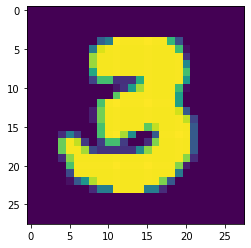

In [9]:
#What are we going to predict?
import matplotlib.pyplot as plt
plt.imshow(x_test[200])
plt.show

#cmap = plt.cm.binary <---- copy this in after imshow for black and white

In [10]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#saving and loading models
model.save("num_reader")
new_model = tf.keras.models.load_model("num_reader")

#predictions
import numpy as np
predictions = model.predict([x_test]) #must be list
print("Number: ",np.argmax(predictions[200]))  #prediction for x_test(...)


INFO:tensorflow:Assets written to: num_reader/assets
Number:  3
